In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### VISUALIZING THE DATASET

<Axes: xlabel='Outcome', ylabel='count'>

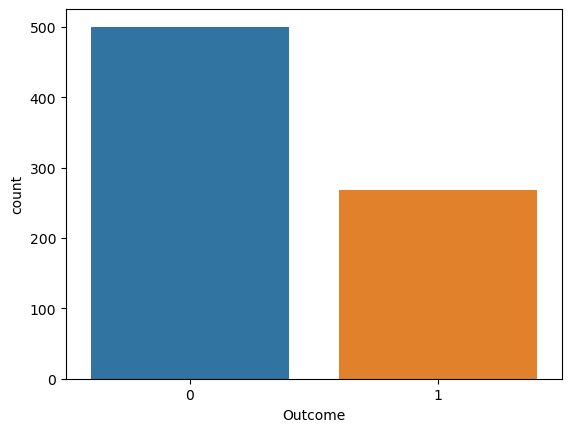

In [ ]:
sns.countplot(x='Outcome', data=df)

In [ ]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create individual figures using Plotly Express
fig_age = px.histogram(df, x="Age", color="Outcome", barmode="stack", title="Age Distribution")
fig_bmi = px.histogram(df, x="BMI", color="Outcome", barmode="stack", title="BMI Distribution")
fig_dpf = px.histogram(df, x="BloodPressure", color="Outcome", barmode="stack", title="Diabetes Pedigree Function Distribution")
fig_glucose = px.histogram(df, x="Glucose", color="Outcome", barmode="stack", title="Glucose Distribution")

# Create a 2x2 subplot layout
fig = make_subplots(rows=2, cols=2, subplot_titles=("Age Distribution", "BMI Distribution",
                                                    "Blood Pressure Distribution", "Glucose Distribution"))

# Add each Plotly Express figure to the subplot
for trace in fig_age.data:
    fig.add_trace(trace, row=1, col=1)

for trace in fig_bmi.data:
    # Set showlegend=False for duplicate legends
    fig.add_trace(trace.update(showlegend=False), row=1, col=2)

for trace in fig_dpf.data:
    fig.add_trace(trace.update(showlegend=False), row=2, col=1)

for trace in fig_glucose.data:
    fig.add_trace(trace.update(showlegend=False), row=2, col=2)

# Update layout
fig.update_layout(
    title="Stacked Histograms for Diabetes Status by Various Features",
    legend_title="Diabetes Status"
)

# Show the plot
fig.show()


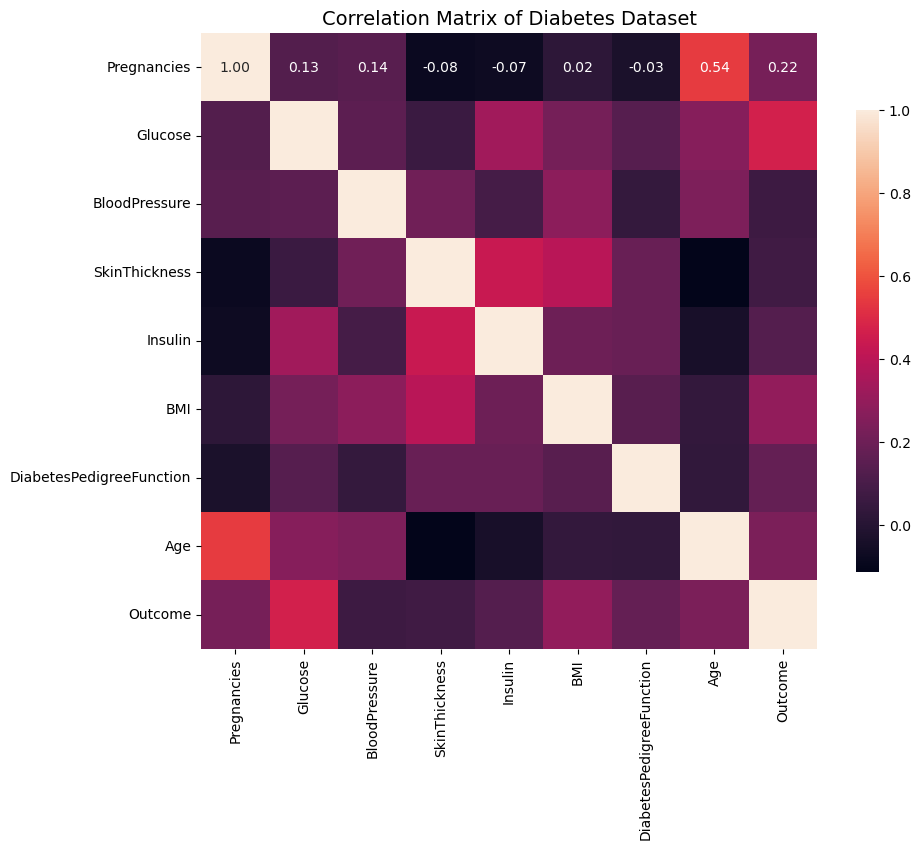

In [46]:
# Set figure size to make it larger and more readable
plt.figure(figsize=(10, 8))

# Plot the heatmap with annotations, improved colormap, and formatting for readability
sns.heatmap(df.corr(), annot=True, fmt=".2f", square=True, 
            cbar_kws={"shrink": .75}, annot_kws={"size": 10})

# Set title for clarity
plt.title("Correlation Matrix of Diabetes Dataset", fontsize=14)

# Display the plot
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed

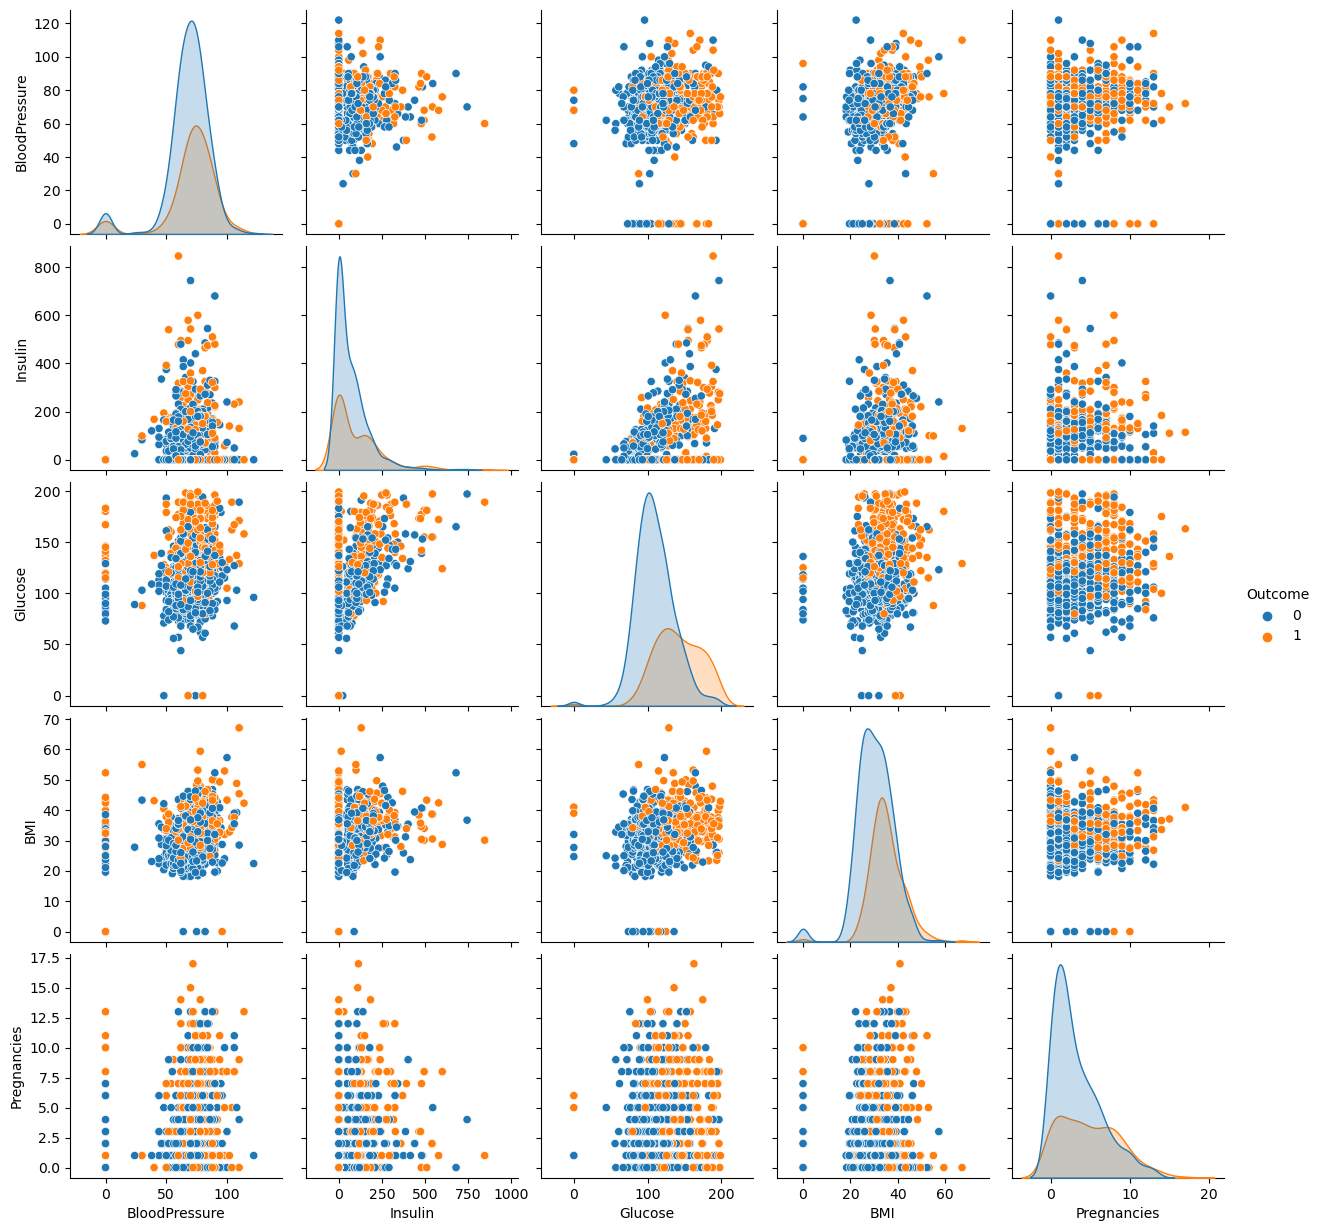

In [ ]:
sns.pairplot(df, hue='Outcome', vars = ['BloodPressure', 'Insulin', 'Glucose', 'BMI', 'Pregnancies'])

### CREATE TESTING AND TRAINING DATASET/CLEANING

In [51]:
# Let's drop the target label coloumns
X = df.drop(['Outcome'],axis=1)
y = df['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### TRAINING THE MODEL

In [71]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [72]:
feature_importance = pd.DataFrame(decision_tree.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importance

,importance
Glucose,0.484148
BMI,0.201849
Age,0.170864
DiabetesPedigreeFunction,0.076123
BloodPressure,0.067016
Pregnancies,0.000000
SkinThickness,0.000000
Insulin,0.000000


### EVALUATING THE MODEL

<Axes: >

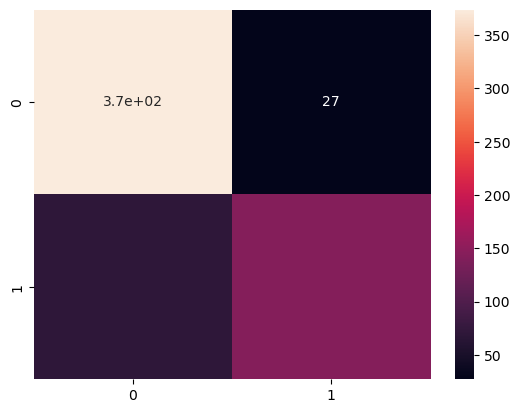

In [73]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict_train = decision_tree.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

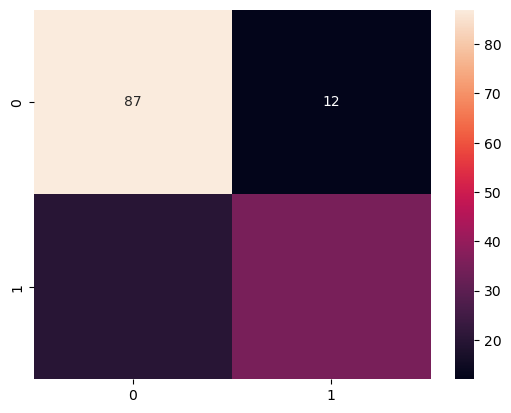

In [74]:
# Predicting the Test set results
y_predict_test = decision_tree.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [75]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.64      0.69        55

    accuracy                           0.79       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154



### TREE VISUALIZAITON

In [ ]:
from IPython.display import Image
#from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
from io import StringIO

features = list(df.columns[1:])
features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [81]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot
from io import StringIO

features = list(df.columns[1:])
features

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [82]:
dot_data = StringIO()
export_graphviz(decision_tree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

FileNotFoundError: [Errno 2] "dot" not found in path.

### RANDOM FOREST

In [83]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier(n_estimators=150)
RandomForest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

<Axes: >

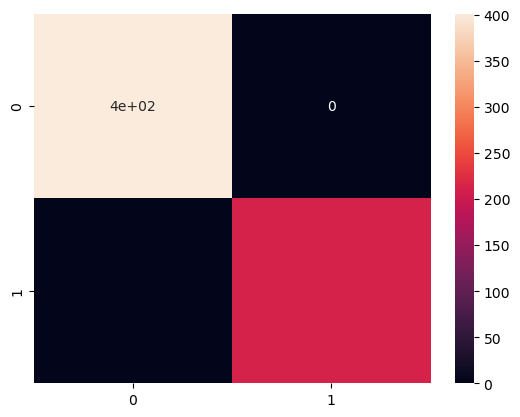

In [84]:
y_predict_train = RandomForest.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

<Axes: >

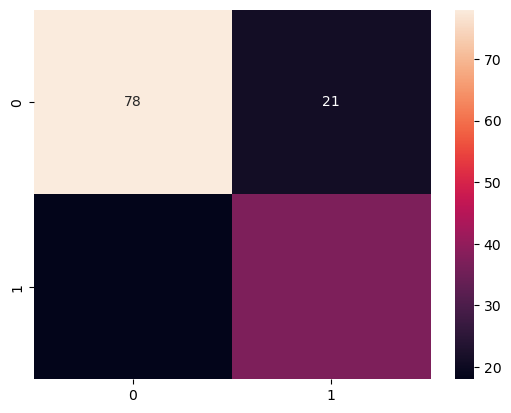

In [85]:
# Predicting the Test set results
y_predict_test = RandomForest.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [86]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

